In [1]:
%pylab
import serial
from time import sleep

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
baudrate=115200
port='/dev/ttyUSB0'
ser_arduino = serial.Serial(port,baudrate, timeout=0.1)

In [10]:
def get_data(buffer_size):
    #buffer_size = 1024
    data        = zeros((3,buffer_size),dtype=int)
    flag_check  = True    

    h = int.from_bytes(ser_arduino.read(), byteorder='big', signed=True)
    j = -1

    while j < (buffer_size-1):
        if flag_check :
            while (h!=-1):
                h = int.from_bytes(ser_arduino.read(), byteorder='big', signed=True)
            flag_check = False
        j+=1
        # Microseconds from the start
        Bit1 = int.from_bytes(ser_arduino.read(), byteorder='big', signed=False)
        Bit2 = int.from_bytes(ser_arduino.read(), byteorder='big', signed=False)
        Bit3 = int.from_bytes(ser_arduino.read(), byteorder='big', signed=False)
        Bit4 = int.from_bytes(ser_arduino.read(), byteorder='big', signed=False)

        # Analog read
        Bit5 = int.from_bytes(ser_arduino.read(), byteorder='big', signed=False)
        Bit6 = int.from_bytes(ser_arduino.read(), byteorder='big', signed=False)

        h = int.from_bytes(ser_arduino.read(), byteorder='big', signed=True)
        if (h > 0):
            print('Problem')
        else:
            # Hours
            data[0,j] = h

            # Microseconds from the start
            data[1,j] = Bit1 + Bit2*2**8 + Bit3*2**16 + Bit4*2**24

            # Analog read
            data[2,j] = Bit5 + Bit6*2**8
    return data

Mean dt[us]= 595.0068426197458
Std dt[us]= 2.1036095454964987


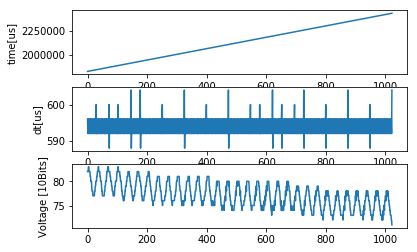

In [12]:
buffer_size = 1024
data = get_data(buffer_size)

figure(1); clf();
subplot(311)
plot(data[1,:])
ylabel('time[us]')
subplot(312)
plot(diff(data[1,:]))
ylabel('dt[us]')
subplot(313)
plot(data[2,:])
ylabel('Voltage [10Bits]')

print('Mean dt[us]=',mean(diff(data[1,:])))
print('Std dt[us]=',std(diff(data[1,:])))